In [33]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [34]:
dset = pd.read_csv('/kaggle/input/titanic/train.csv')
dset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
y_train = dset['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
dummies = pd.get_dummies(X.Sex)
dummies

,female,male
PassengerId,,
1,False,True
2,True,False
3,True,False
4,True,False
5,False,True
...,...,...
887,False,True
888,True,False
889,True,False


In [38]:
X = pd.concat([X,dummies], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,female,male
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,NaN,S,False,True
2,1,female,38.0,1,0,C85,C,True,False
3,3,female,26.0,0,0,NaN,S,True,False
4,1,female,35.0,1,0,C123,S,True,False
5,3,male,35.0,0,0,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,NaN,S,False,True
888,1,female,19.0,0,0,B42,S,True,False
889,3,female,NaN,1,2,NaN,S,True,False


In [39]:
X = X.drop('Sex', axis=1)
X

,Pclass,Age,SibSp,Parch,Cabin,Embarked,female,male
PassengerId,,,,,,,,
1,3,22.0,1,0,NaN,S,False,True
2,1,38.0,1,0,C85,C,True,False
3,3,26.0,0,0,NaN,S,True,False
4,1,35.0,1,0,C123,S,True,False
5,3,35.0,0,0,NaN,S,False,True
...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,NaN,S,False,True
888,1,19.0,0,0,B42,S,True,False
889,3,NaN,1,2,NaN,S,True,False


In [40]:
X = X.drop('male', axis=1)

In [41]:
dummies = pd.get_dummies(X.Embarked)
dummies.drop('S',inplace=True, axis=1)
X.drop('Embarked',inplace=True, axis=1)

In [42]:
X = pd.concat([X,dummies], axis=1)

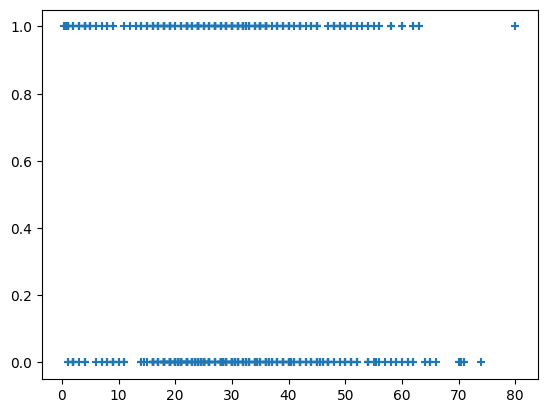

In [45]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X.Age,y_train,marker='+')
plt.show()

<Axes: >

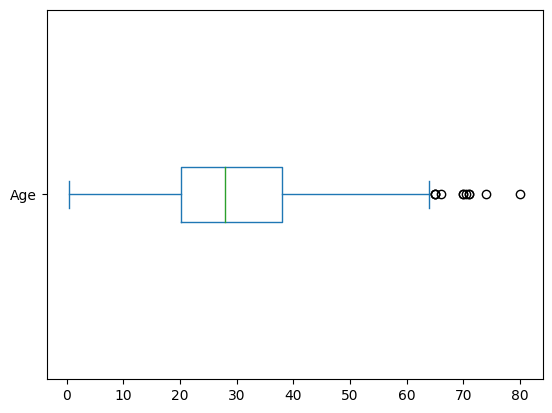

In [47]:
X.Age.plot.box(vert=False)

In [50]:
X[X.Age>X.Age.max()].replace('Age',np.NaN)
X

,Pclass,Age,SibSp,Parch,Cabin,female,C,Q
PassengerId,,,,,,,,
1,3,22.0,1,0,NaN,False,False,False
2,1,38.0,1,0,C85,True,True,False
3,3,26.0,0,0,NaN,True,False,False
4,1,35.0,1,0,C123,True,False,False
5,3,35.0,0,0,NaN,False,False,False
...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,NaN,False,False,False
888,1,19.0,0,0,B42,True,False,False
889,3,NaN,1,2,NaN,True,False,False


<Axes: >

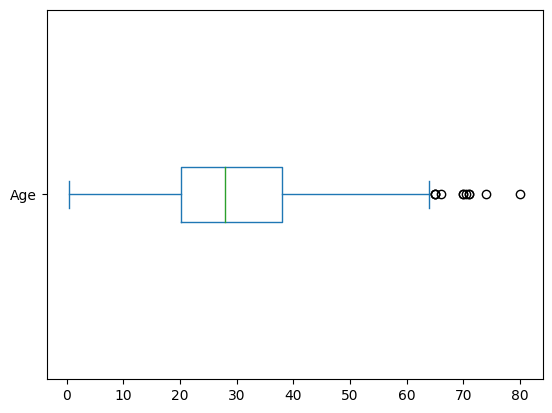

In [51]:
X.Age.plot.box(vert=False)